In [2]:
from google.colab import drive
drive.mount('/gdrive')
#  %cd /gdrive/My Drive

Mounted at /gdrive


In [3]:
%cd /gdrive/My Drive

/gdrive/My Drive


In [4]:
# Fix randomness and hide warnings
seed = 42

# Filter warnings from keras
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.random.set_seed(seed)
print(f"TensorFlow version {tf.__version__}")

# Import other libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=14)
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

TensorFlow version 2.17.0


In [5]:
import numpy as np

data = np.load('training_set.npz')
X = data['images']
y = data['labels']


In [6]:
print('Counting occurrences of target classes:')
print(pd.DataFrame(y, columns=['labels'])['labels'].value_counts())

Counting occurrences of target classes:
labels
6    2530
1    2381
3    2226
7    1843
5    1393
2    1285
0    1052
4    1049
Name: count, dtype: int64


In [7]:

# Usa np.unique per trovare indici delle immagini uniche
_, unique_indices = np.unique(X.reshape(len(X), -1), axis=0, return_index=True)

# Estrai le immagini e le etichette corrispondenti agli indici unici
X = X[unique_indices]
y = y[unique_indices]



In [8]:
print('Counting occurrences of target classes:')
print(pd.DataFrame(y, columns=['labels'])['labels'].value_counts())

Counting occurrences of target classes:
labels
6    2330
1    2179
3    2023
7    1643
2    1085
5     993
0     851
4     849
Name: count, dtype: int64


In [ ]:
print(len(X))

11953


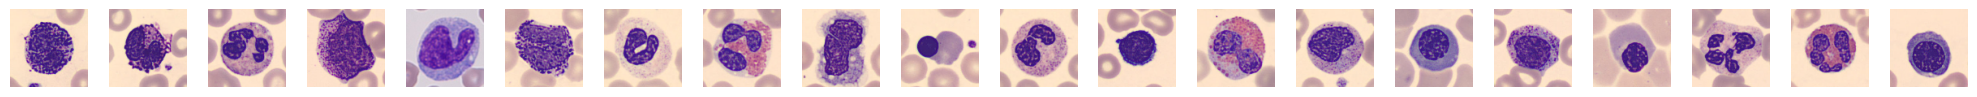

In [9]:
# Display a sample of images from the training-validation dataset
num_img = 20
random_indices = random.sample(range(len(X)), num_img)

fig, axes = plt.subplots(1, num_img, figsize=(20, 20))

# Iterate through the selected number of images
for i, idx in enumerate(random_indices):
    ax = axes[i % num_img]
    ax.imshow(np.squeeze(X[idx]), vmin=0., vmax=1.)
    ax.axis('off')

# Adjust layout and display the images
plt.tight_layout()
plt.show()

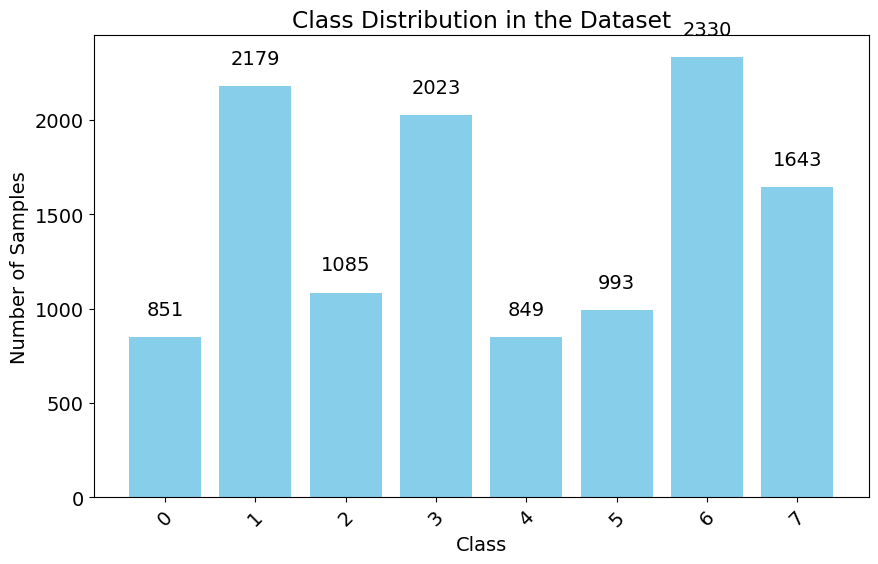

In [10]:
# Count occurrences of each class
classes, counts = np.unique(y, return_counts=True)

# Create a bar plot to show class distribution
plt.figure(figsize=(10, 6))
plt.bar(classes.astype(str), counts, color='skyblue')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in the Dataset')

# Optionally, add the count value above each bar
for i in range(len(classes)):
    plt.text(classes[i], counts[i] + 0.05 * max(counts), str(counts[i]), ha='center')

# Show the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels if needed
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = [], [], [], []

#shuffle X and y
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

# Select exactly 'n' instances per class for validation
n = 125  # Set the number of validation instances per class
for class_label in np.unique(y):
    # Get all indices for the current class
    class_indices = np.where(y == class_label)[0]

    # Shuffle to ensure randomness in selection
    np.random.shuffle(class_indices)

    # Select n instances for the validation set
    val_indices = class_indices[:n]

    # Add selected validation instances to the validation list
    X_val.append(X[val_indices])
    y_val.append(y[val_indices])

    # The remaining instances are used for training
    train_indices = class_indices[n:]
    X_train.append(X[train_indices])
    y_train.append(y[train_indices])

# Combine the lists back into arrays
X_train = np.concatenate(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)
X_val = np.concatenate(X_val, axis=0)
y_val = np.concatenate(y_val, axis=0)
# Shuffle
indices_train = np.random.permutation(len(X_train))
indices_val = np.random.permutation(len(X_val))
X_train = X_train[indices_train]
y_train = y_train[indices_train]
X_val = X_val[indices_val]
y_val = y_val[indices_val]
# Print shapes
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(10953, 96, 96, 3) (10953, 1)
(1000, 96, 96, 3) (1000, 1)


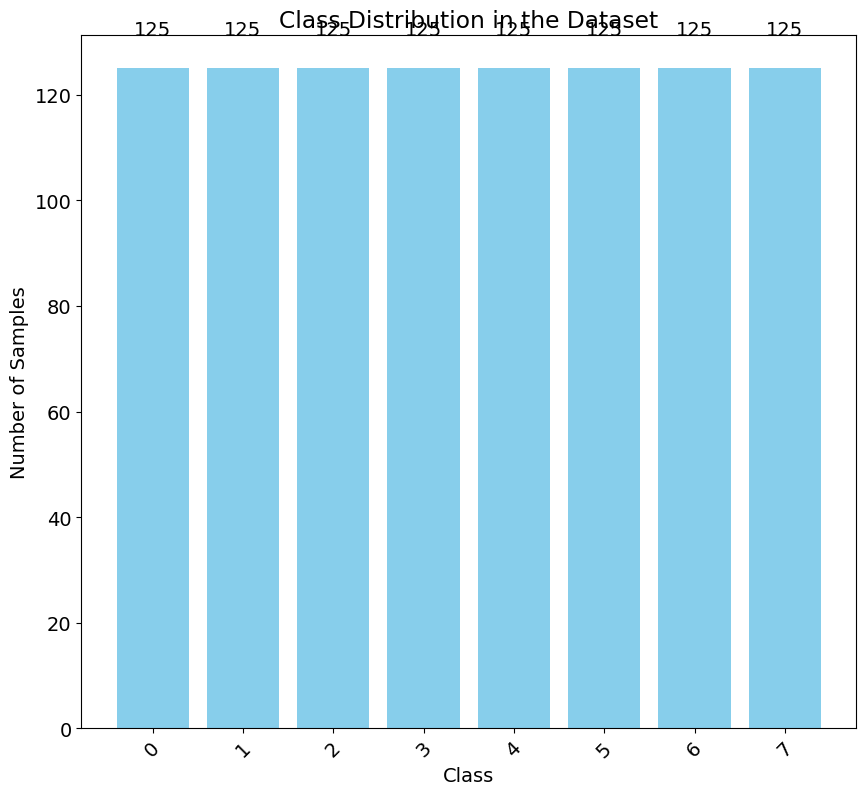

In [12]:
# Count occurrences of each class
classes, counts = np.unique(y_val, return_counts=True)

# Create a bar plot to show class distribution
plt.figure(figsize=(10, 9))
plt.bar(classes.astype(str), counts, color='skyblue')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in the Dataset')

# Optionally, add the count value above each bar
for i in range(len(classes)):
    plt.text(classes[i], counts[i] + 0.05 * max(counts), str(counts[i]), ha='center')

# Show the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels if needed
plt.show()

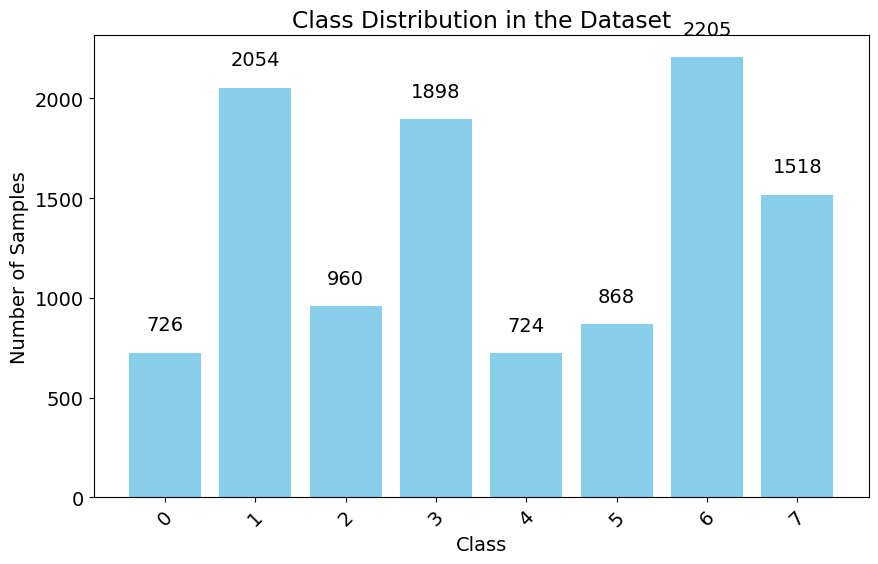

In [13]:
# Count occurrences of each class
classes, counts = np.unique(y_train, return_counts=True)

# Create a bar plot to show class distribution
plt.figure(figsize=(10, 6))
plt.bar(classes.astype(str), counts, color='skyblue')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in the Dataset')

# Optionally, add the count value above each bar
for i in range(len(classes)):
    plt.text(classes[i], counts[i] + 0.05 * max(counts), str(counts[i]), ha='center')

# Show the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels if needed
plt.show()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 96, 96, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ data_augmentation_1       │ (None, 96, 96, 3)      │              0 │ input_layer_3[0][0]    │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_1 (Sequential) │ (None, 96, 96, 3)      │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_2 (Sequential) │ (None, 96, 96, 3)      │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Effnet_1 (Functional)     │ (None, 1280)           │     20,331,360 │ data_augmentation_1[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Effnet_2 (Functional)     │ (None, 1280)           │     20,331,360 │ sequential_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Effnet_3 (Functional)     │ (None, 1280)           │     20,331,360 │ sequential_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 3840)           │              0 │ Effnet_1[0][0],        │
│                           │                        │                │ Effnet_2[0][0],        │
│                           │                        │                │ Effnet_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 8)              │         30,728 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 8)              │             72 │ dense[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 61,024,880 (232.79 MB)

 Trainable params: 30,800 (120.31 KB)

 Non-trainable params: 60,994,080 (232.67 MB)

In [15]:
#Transfer learning of EfficientNets
import keras
from tensorflow.keras.layers import Input, Concatenate, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomContrast, RandomBrightness
from tensorflow.keras.optimizers import Adadelta

tf.keras.backend.clear_session()

#Import models
Effnet_1 = keras.applications.EfficientNetV2S(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(96,96,3),
    pooling="avg",
    include_preprocessing=True,)

Effnet_2 = keras.applications.EfficientNetV2S(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(96,96,3),
    pooling="avg",
    include_preprocessing=True,)

Effnet_3 = keras.applications.EfficientNetV2S(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(96,96,3),
    pooling="avg",
    include_preprocessing=True,)

#change models name and avoid chaos
Effnet_1.name = 'Effnet_1'
Effnet_2.name = 'Effnet_2'
Effnet_3.name = 'Effnet_3'

#freeze models weights
Effnet_1.trainable = False
Effnet_2.trainable = False
Effnet_3.trainable = False

#define data augmentation layers
data_augmentation_1 = tf.keras.Sequential([
    RandomFlip('horizontal'),  # Flip images horizontally
    RandomRotation(0.3),  # Rotate images
    RandomContrast(0.3),  # Random contrast
    RandomBrightness(0.1),  # Random brightness
    RandomZoom(0.2),  # Random zoom
])
data_augmentation_1.name = 'data_augmentation_1'

data_augmentation_2 = tf.keras.Sequential([
    RandomFlip('horizontal'),  # Flip images horizontally
    RandomRotation(0.3),  # Rotate images
    RandomContrast(0.3),  # Random contrast
    RandomBrightness(0.1),  # Random brightness
    RandomZoom(0.2),  # Random zoom
])
data_augmentation_2.name = 'data_augmentation_2'

data_augmentation_3 = tf.keras.Sequential([
    RandomFlip('horizontal'),  # Flip images horizontally
    RandomRotation(0.3),  # Rotate images
    RandomContrast(0.3),  # Random contrast
    RandomBrightness(0.1),  # Random brightness
    RandomZoom(0.2),  # Random zoom
])
data_augmentation_3.name = 'data_augmentation_3'

#add data augmentation layers to the base models
input_tensor = Input(shape=(96, 96, 3))
augmented_input_1 = data_augmentation_1(input_tensor)
augmented_input_2 = data_augmentation_2(input_tensor)
augmented_input_3 = data_augmentation_3(input_tensor)
Effnet_1_output = Effnet_1(augmented_input_1)
Effnet_2_output = Effnet_2(augmented_input_2)
Effnet_3_output = Effnet_3(augmented_input_3)

#concate model output
x = Concatenate()([Effnet_1_output,Effnet_2_output,Effnet_3_output])
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(8, activation='softmax')(x)

#build model
model = Model(inputs=input_tensor, outputs=x)

# Step 8: Compile the Model
model.compile(optimizer=Adadelta(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 96, 96, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ data_augmentation_1       │ (None, 96, 96, 3)      │              0 │ input_layer_3[0][0]    │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ data_augmentation_2       │ (None, 96, 96, 3)      │              0 │ input_layer_3[0][0]    │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ data_augmentation_3       │ (None, 96, 96, 3)      │              0 │ input_layer_3[0][0]    │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Effnet_1 (Functional)     │ (None, 1280)           │     20,331,360 │ data_augmentation_1[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Effnet_2 (Functional)     │ (None, 1280)           │     20,331,360 │ data_augmentation_2[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Effnet_3 (Functional)     │ (None, 1280)           │     20,331,360 │ data_augmentation_3[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 3840)           │              0 │ Effnet_1[0][0],        │
│                           │                        │                │ Effnet_2[0][0],        │
│                           │                        │                │ Effnet_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 3840)           │              0 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 256)            │        983,296 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 256)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 8)              │          2,056 │ dropout_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 61,979,432 (236.43 MB)

 Trainable params: 985,352 (3.76 MB)

 Non-trainable params: 60,994,080 (232.67 MB)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping

# Convert one-hot encoded labels to integer labels
if y_train.ndim > 1:
    y_int_train = np.argmax(y, axis=1)  # Flatten the one-hot labels to class indices
else:
    y_int_train = y_train  # Already in integer format

# Assuming `y_train` is the label array
class_weights = compute_class_weight('balanced', classes=np.unique(y_int_train), y=y_int_train)
class_weights = dict(enumerate(class_weights))

#convert target to categorical
from tensorflow.keras.utils import to_categorical
num_classes = 8  # Example number of classes

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

print(y_train.shape)
print(y_val.shape)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=250, batch_size=256, callbacks=[early_stopping], class_weight=class_weights)

# Print the final training and validation loss
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"Final training loss: {final_train_loss}")
print(f"Final validation loss: {final_val_loss}")

import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


(10953, 8)
(1000, 8)
Epoch 1/250
43/43 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.1298 - loss: 2.1757 - val_accuracy: 0.1080 - val_loss: 2.1376
Epoch 2/250
43/43 ━━━━━━━━━━━━━━━━━━━━ 54s 685ms/step - accuracy: 0.1369 - loss: 2.1391 - val_accuracy: 0.1300 - val_loss: 2.1179
Epoch 3/250
43/43 ━━━━━━━━━━━━━━━━━━━━ 42s 708ms/step - accuracy: 0.1643 - loss: 2.1002 - val_accuracy: 0.1370 - val_loss: 2.1017
Epoch 4/250
43/43 ━━━━━━━━━━━━━━━━━━━━ 40s 696ms/step - accuracy: 0.1821 - loss: 2.0649 - val_accuracy: 0.1470 - val_loss: 2.0877
Epoch 5/250
43/43 ━━━━━━━━━━━━━━━━━━━━ 41s 698ms/step - accuracy: 0.1975 - loss: 2.0260 - val_accuracy: 0.1590 - val_loss: 2.0751
Epoch 6/250
43/43 ━━━━━━━━━━━━━━━━━━━━ 30s 694ms/step - accuracy: 0.2243 - loss: 2.0008 - val_accuracy: 0.1690 - val_loss: 2.0631
Epoch 7/250
43/43 ━━━━━━━━━━━━━━━━━━━━ 41s 697ms/step - accuracy: 0.2427 - loss: 1.9770 - val_accuracy: 0.1840 - val_loss: 2.0505
Epoch 8/250
43/43 ━━━━━━━━━━━━━━━━━━━━ 30s 705ms/step - accuracy: 0.255

In [ ]:
#keras.clear_session()
model.save("attempt_def.keras")


In [ ]:
tf.keras.backend.clear_session(free_memory=True)


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adadelta

#Load the saved model
model = load_model('attempt_y.keras')
# Unfreeze specific layers in each EfficientNet model

for layer in model.get_layer('Effnet_1').layers[-50:]:
    if not isinstance(layer, BatchNormalization):
            layer.trainable = True

for layer in model.get_layer('Effnet_2').layers[-50:]:
    if not isinstance(layer, BatchNormalization):
            layer.trainable = True

for layer in model.get_layer('Effnet_2').layers[-50:]:
    if not isinstance(layer, BatchNormalization):
            layer.trainable = True

#compile the model
model.compile(optimizer=Adadelta(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 122s 614ms/step - accuracy: 0.7567 - loss: 0.6842 - val_accuracy: 0.6030 - val_loss: 0.9808
Epoch 2/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 35s 404ms/step - accuracy: 0.7672 - loss: 0.6549 - val_accuracy: 0.6000 - val_loss: 0.9544
Epoch 3/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 43s 430ms/step - accuracy: 0.7690 - loss: 0.6406 - val_accuracy: 0.6100 - val_loss: 0.9354
Epoch 4/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 432ms/step - accuracy: 0.7722 - loss: 0.6230 - val_accuracy: 0.6140 - val_loss: 0.9248
Epoch 5/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 39s 403ms/step - accuracy: 0.7740 - loss: 0.6057 - val_accuracy: 0.6080 - val_loss: 0.9162
Epoch 6/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 37s 432ms/step - accuracy: 0.7770 - loss: 0.5917 - val_accuracy: 0.6170 - val_loss: 0.8978
Epoch 7/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 38s 402ms/step - accuracy: 0.7800 - loss: 0.5957 - val_accuracy: 0.6210 - val_loss: 0.8847
Epoch 8/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 43s 430ms/step - accuracy: 0.7820 - loss: 0.5746 -

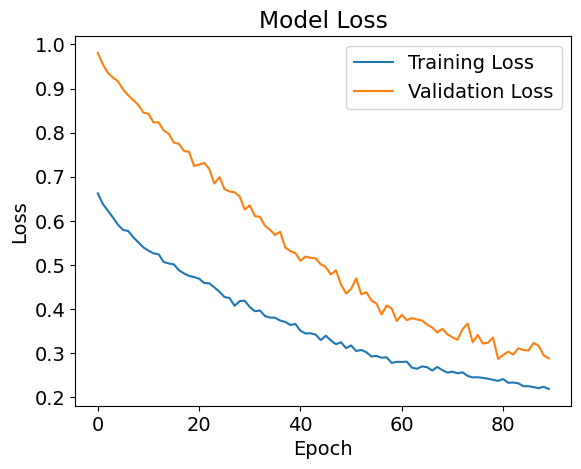

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping

#train
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=250, batch_size=256, callbacks=[early_stopping], class_weight=class_weights)

# Print the final training and validation loss
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"Final training loss: {final_train_loss}")
print(f"Final validation loss: {final_val_loss}")

import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

#save the model
model.save("attempt_def_finetuned.keras")

32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 592ms/step
Confusion Matrix:
 [[123   0   1   0   0   1   0   0]
 [  4 118   1   2   0   0   0   0]
 [  0   0 108   5   3   5   4   0]
 [  2   0   1 114   0   5   3   0]
 [  0   0   1   2 114   6   0   2]
 [  2   0   0  19   1 103   0   0]
 [  2   4   0   6   0   0 113   0]
 [  0   0   0   1   1   0   2 121]]


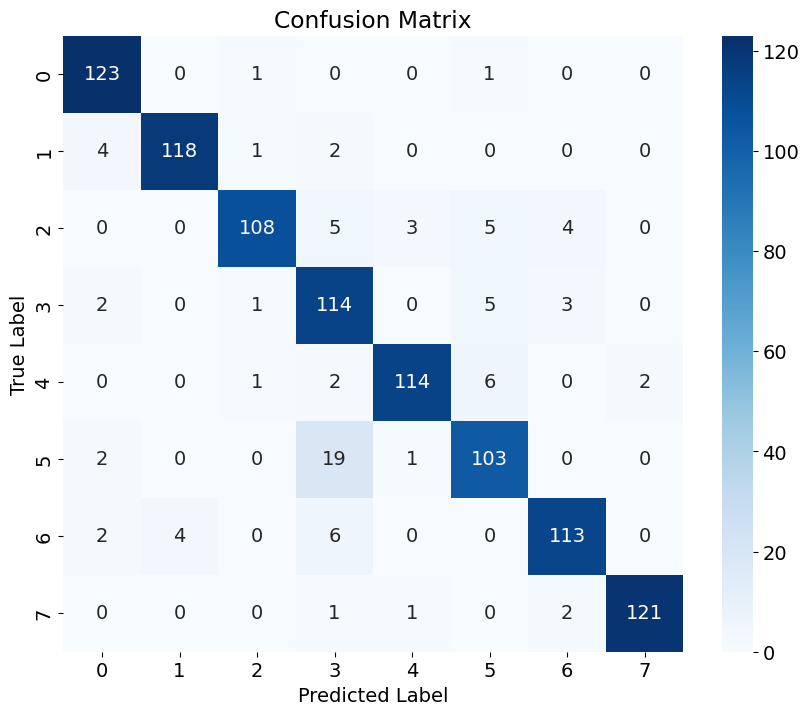

In [ ]:
from tensorflow.keras import  models
import numpy as np
model = models.load_model("attempt_def_finetuned.keras")
# Predict probabilities for each class
y_pred_probs = model.predict(X_val, training=True)

# Convert probabilities to class predictions (index of max probability)
y_pred = np.argmax(y_pred_probs, axis=-1)

import tensorflow as tf

# Compute confusion matrix
conf_matrix = tf.math.confusion_matrix(np.argmax(y_val, axis=-1), y_pred)
print("Confusion Matrix:\n", conf_matrix.numpy())
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# file: model.py
from tensorflow.keras import  models
import numpy as np
class Model:
    def __init__(self):
        self.model = models.load_model("attempt_def_finetuned.keras")

    def predict(self, X):
        predicted_classes = np.argmax(self.model.predict(X, training=True), axis=-1)
        return predicted_classes
